In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# separate our dataset into 
cat_columns = data.select_dtypes(include=["object"]).columns.tolist()
print("Categorical Columns: " , cat_columns)
num_columns = data.select_dtypes(exclude=["object"]).columns.tolist()
print("Numerical Columns: " , num_columns)

Categorical Columns:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical Columns:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


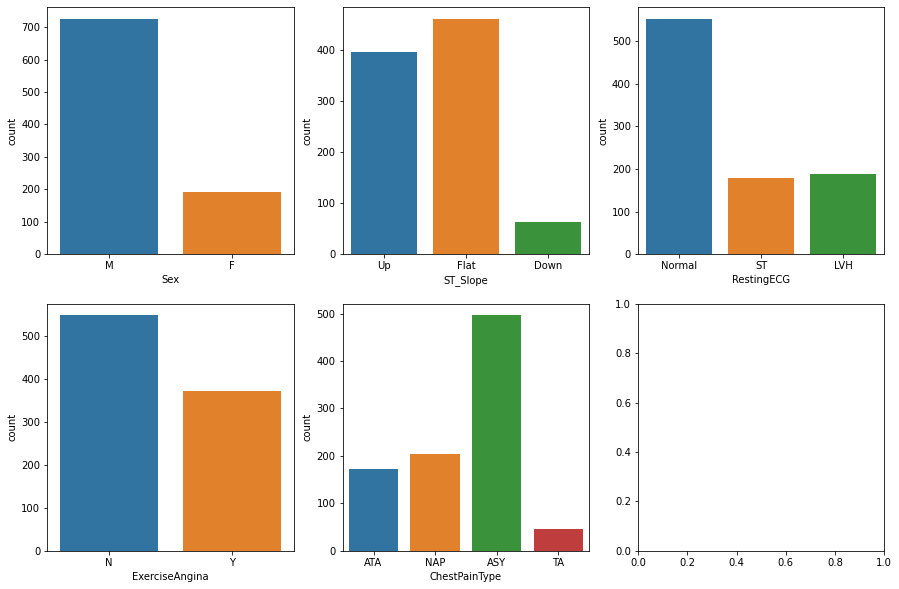

In [6]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(cat_columns):
    sns.countplot(x = data[col], data = data, ax=axes[i%2,i%3])
    
plt.show()

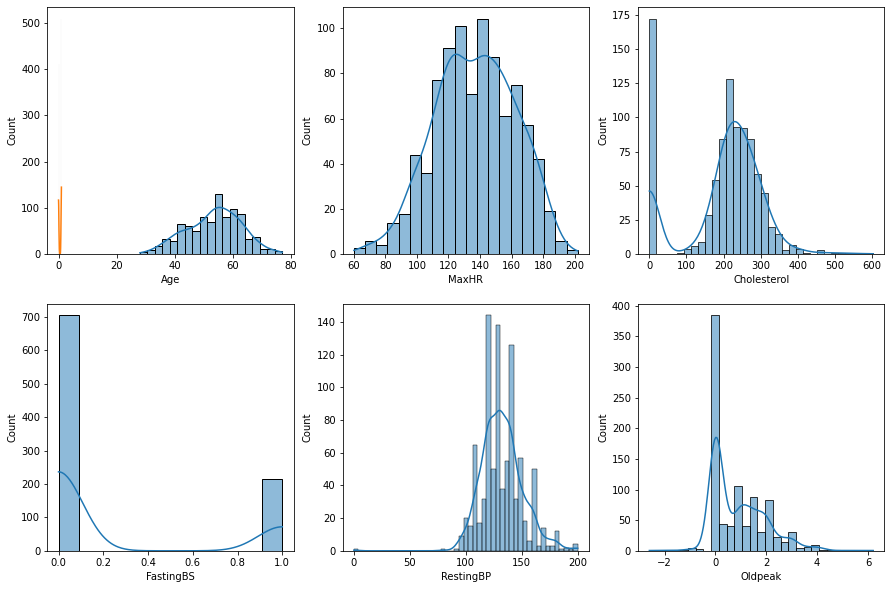

In [7]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(num_columns):
    sns.histplot(x = data[col], data = data, kde=True, ax=axes[i%2,i%3])

plt.show()

In [8]:
# missing values

print("- null values:")
print(data.isnull().sum())

print("- number of duplicated values:")
print(data.duplicated().sum())

print("- number of zero values:")
print((data == 0).sum())


- null values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
- number of duplicated values:
0
- number of zero values:
Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS         704
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease      410
dtype: int64


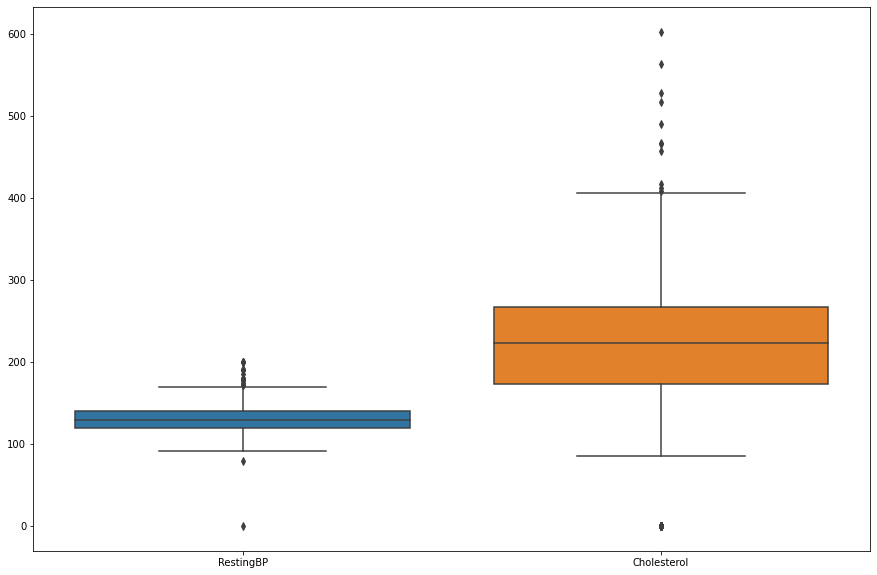

In [9]:
# checking for outliers

# RestingBP > 0
# Cholesterol > 0

f, axes = plt.subplots(figsize=(15, 10))

sns.boxplot(data=data[["RestingBP", "Cholesterol"]])  

plt.show() # we have outliers on the features

In [10]:
# Replacing missing values with median

data_to_change = data[["RestingBP", "Cholesterol"]]
data_to_change = data_to_change.replace(to_replace= 0, value = np.nan)
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
data_to_change = pd.DataFrame(imputer.fit_transform(data_to_change), columns=["RestingBP", "Cholesterol"])

for column in data_to_change.columns.tolist():
    data[column] = data_to_change[column]

print((data == 0).sum())


Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
FastingBS         704
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease      410
dtype: int64


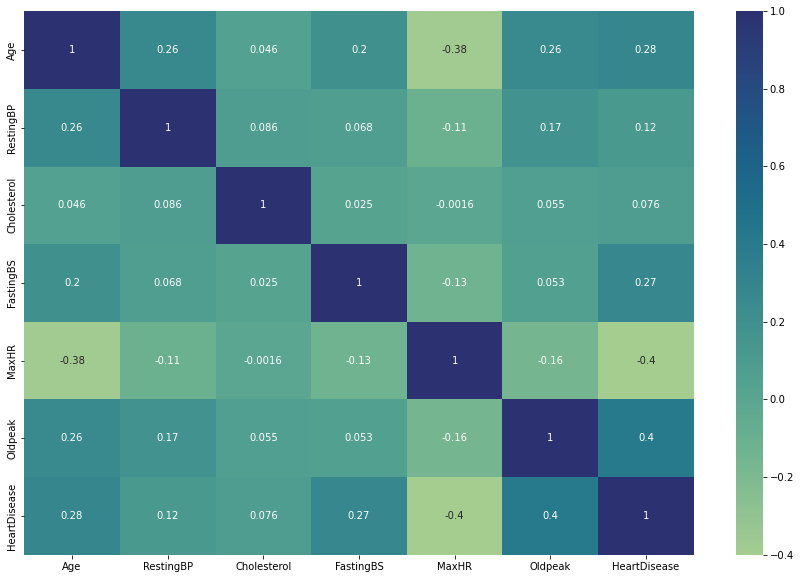

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap="crest")
plt.show()

In [12]:
# encoding categorical features

data_label_encoded = data.copy()

data_one_hot_encoded = pd.get_dummies(data, drop_first=True)

for col in cat_columns:
    data_label_encoded[col] = LabelEncoder().fit_transform(data[col])
 

In [13]:
# spliting train and test sets

X = data_label_encoded.drop(data_label_encoded.columns.tolist().pop(), axis=1)
Y = data_label_encoded.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y)

In [14]:
# data standardization

num_columns.remove("HeartDisease")
X_train_numeric = X_train[num_columns]
X_test_numeric = X_test[num_columns]

X_train_numeric_st = StandardScaler().fit_transform(X_train_numeric) # CHANGE IT
X_test_numeric_st = StandardScaler().fit_transform(X_test_numeric) # CHANGE IT

X_train_numeric_st = pd.DataFrame(X_train_numeric_st, columns=num_columns)
X_test_numeric_st = pd.DataFrame(X_test_numeric_st, columns=num_columns)

X_train[num_columns] = X_train_numeric_st
X_test[num_columns] = X_test_numeric_st
